In [2]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from weather_data import WeatherData, ModelBasedOptions, HourlyData
from datetime import datetime
import pandas as pd


In [3]:
latitude = 50.732817
longitude = 16.648050

# latitude = 52.30
# longitude = 8.91

start_date = datetime(2022, 1, 1)
end_date = datetime(2022, 1, 31)

options = ModelBasedOptions(
    hourly=[
        HourlyData.Temperature_2m,
        HourlyData.RelativeHumidity_2m,
        HourlyData.WindDirection_10m,
        HourlyData.WindSpeed_10m,
        HourlyData.Precipitation_rain_showers_snow,
    ]
)
meta_data_model, daily_model, hourly_model = WeatherData.getModelBasedData(
    latitude, longitude, start_date, end_date, options
)

meta_data_station, daily_station, hourly_station = WeatherData.getStationData(
    latitude, longitude, start_date, end_date, require_daily=False, require_hourly=True, skip_stations=["12150"]
)


In [4]:
meta_data_station.__dict__


{'id': '12520',
 'name': 'Klodzko',
 'country': 'PL',
 'region': 'DO',
 'wmo_id': '12520',
 'icao_id': <NA>,
 'latitude': 50.4333,
 'longitude': 16.6167,
 'elevation': 356.0,
 'timezone': 'Europe/Warsaw',
 'hourly_start': Timestamp('1952-01-02 00:00:00'),
 'hourly_end': Timestamp('2023-04-12 00:00:00'),
 'daily_start': Timestamp('1999-03-19 00:00:00'),
 'daily_end': Timestamp('2022-03-30 00:00:00'),
 'monthly_start': Timestamp('1951-01-01 00:00:00'),
 'monthly_end': Timestamp('2021-01-01 00:00:00'),
 'distance': 33378.241811942076}

In [5]:
hourly_model


,temperature_2m,relativehumidity_2m,winddirection_10m,windspeed_10m,precipitation
time,,,,,
2022-01-01 00:00:00,9.4,82,262,18.2,0.0
2022-01-01 01:00:00,9.5,84,268,20.5,0.3
2022-01-01 02:00:00,9.6,88,177,13.3,0.1
2022-01-01 03:00:00,9.7,90,176,14.1,0.0
2022-01-01 04:00:00,9.9,91,188,13.4,0.0
...,...,...,...,...,...
2022-01-31 19:00:00,1.1,78,171,2.2,0.0
2022-01-31 20:00:00,-0.6,87,144,3.1,0.0
2022-01-31 21:00:00,-1.3,89,138,4.3,0.0


In [34]:
df = pd.read_csv("../../data/pollution/2022_16_101.csv")

d = {"value": "sum"}

# JANUAR
januar = df[(df["date"] >= "2022-01-01 00:00:00") & (df["date"] <= "2022-01-31 23:00:00")]
# add missing values to Januar
januar.loc[194.5] = ["2022-01-09 03:00:00", 0.00]
januar.loc[194.7] = ["2022-01-09 04:00:00", 0.00]

januar = januar.reset_index()
result_januar = januar.groupby(januar.index // 24).agg(d)
result_januar = (result_januar["value"] / 24).round(5)

np_januar = result_januar.to_numpy()
result_januar = pd.DataFrame(np_januar, columns=["value"], index=pd.date_range("2022-01-01", periods=31))


jan = result_januar.to_numpy().ravel()


C:\Users\svea\AppData\Local\Temp\ipykernel_24932\145700737.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\svea\AppData\Local\Temp\ipykernel_24932\145700737.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [15]:
fig_model = make_subplots(specs=[[{"secondary_y": True}]], column_titles=["Model based weather data"])

fig_model.add_trace(go.Scatter(x=hourly_model.index, y=hourly_model["temperature_2m"], name="Temperature [°C]"))
fig_model.add_trace(go.Bar(x=hourly_model.index, y=januar["value"], name="PM10 Value"), secondary_y=True)


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'name': 'Temperature [°C]',
              'type': 'scatter',
              'x': array([datetime.datetime(2022, 1, 1, 0, 0),
                          datetime.datetime(2022, 1, 1, 1, 0),
                          datetime.datetime(2022, 1, 1, 2, 0), ...,
                          datetime.datetime(2022, 1, 31, 21, 0),
                          datetime.datetime(2022, 1, 31, 22, 0),
                          datetime.datetime(2022, 1, 31, 23, 0)], dtype=object),
              'y': array([ 9.4,  9.5,  9.6, ..., -1.3, -2.1, -2.2])},
             {'name': 'PM10 Value',
              'type': 'bar',
              'x': array([datetime.datetime(2022, 1, 1, 0, 0),
                          datetime.datetime(2022, 1, 1, 1, 0),
                          datetime.datetime(2022, 1, 1, 2, 0), ...,
                          datetime.datetime(2022, 1, 31, 21, 0),
                          datetime.datetime(2022, 1, 31, 22, 0),
                          datetime.datetime(2022, 1, 31, 23, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([ 5.37569, 24.9614 ,  4.70004, ..., 56.1764 ,  0.     ,  0.     ]),
              'yaxis': 'y2'}],
    'layout': {'annotations': [{'font': {'size': 16},
                                'showarrow': False,
                                'text': 'Model based weather data',
                                'x': 0.47,
                                'xanchor': 'center',
                                'xref': 'paper',
                                'y': 1.0,
                                'yanchor': 'bottom',
                                'yref': 'paper'}],
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 0.94]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0]},
               'yaxis2': {'anchor': 'x', 'overlaying': 'y', 'side': 'right'}}
})

In [16]:
fig_model = make_subplots(specs=[[{"secondary_y": True}]], column_titles=["Model based weather data"])

fig_model.add_trace(go.Scatter(x=hourly_model.index, y=hourly_model["relativehumidity_2m"], name="Feuchtigkeit"))
fig_model.add_trace(go.Bar(x=hourly_model.index, y=januar["value"], name="PM10 Value"), secondary_y=True)


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'name': 'Feuchtigkeit',
              'type': 'scatter',
              'x': array([datetime.datetime(2022, 1, 1, 0, 0),
                          datetime.datetime(2022, 1, 1, 1, 0),
                          datetime.datetime(2022, 1, 1, 2, 0), ...,
                          datetime.datetime(2022, 1, 31, 21, 0),
                          datetime.datetime(2022, 1, 31, 22, 0),
                          datetime.datetime(2022, 1, 31, 23, 0)], dtype=object),
              'y': array([82, 84, 88, ..., 89, 91, 91], dtype=int64)},
             {'name': 'PM10 Value',
              'type': 'bar',
              'x': array([datetime.datetime(2022, 1, 1, 0, 0),
                          datetime.datetime(2022, 1, 1, 1, 0),
                          datetime.datetime(2022, 1, 1, 2, 0), ...,
                          datetime.datetime(2022, 1, 31, 21, 0),
                          datetime.datetime(2022, 1, 31, 22, 0),
                          datetime.datetime(2022, 1, 31, 23, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([ 5.37569, 24.9614 ,  4.70004, ..., 56.1764 ,  0.     ,  0.     ]),
              'yaxis': 'y2'}],
    'layout': {'annotations': [{'font': {'size': 16},
                                'showarrow': False,
                                'text': 'Model based weather data',
                                'x': 0.47,
                                'xanchor': 'center',
                                'xref': 'paper',
                                'y': 1.0,
                                'yanchor': 'bottom',
                                'yref': 'paper'}],
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 0.94]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0]},
               'yaxis2': {'anchor': 'x', 'overlaying': 'y', 'side': 'right'}}
})

In [17]:
fig_model = make_subplots(specs=[[{"secondary_y": True}]], column_titles=["Model based weather data"])

fig_model.add_trace(go.Scatter(x=hourly_model.index, y=hourly_model["winddirection_10m"], name="Windrichtung"))
fig_model.add_trace(go.Bar(x=hourly_model.index, y=januar["value"], name="PM10 Value"), secondary_y=True)


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'name': 'Windrichtung',
              'type': 'scatter',
              'x': array([datetime.datetime(2022, 1, 1, 0, 0),
                          datetime.datetime(2022, 1, 1, 1, 0),
                          datetime.datetime(2022, 1, 1, 2, 0), ...,
                          datetime.datetime(2022, 1, 31, 21, 0),
                          datetime.datetime(2022, 1, 31, 22, 0),
                          datetime.datetime(2022, 1, 31, 23, 0)], dtype=object),
              'y': array([262, 268, 177, ..., 138, 122, 117], dtype=int64)},
             {'name': 'PM10 Value',
              'type': 'bar',
              'x': array([datetime.datetime(2022, 1, 1, 0, 0),
                          datetime.datetime(2022, 1, 1, 1, 0),
                          datetime.datetime(2022, 1, 1, 2, 0), ...,
                          datetime.datetime(2022, 1, 31, 21, 0),
                          datetime.datetime(2022, 1, 31, 22, 0),
                          datetime.datetime(2022, 1, 31, 23, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([ 5.37569, 24.9614 ,  4.70004, ..., 56.1764 ,  0.     ,  0.     ]),
              'yaxis': 'y2'}],
    'layout': {'annotations': [{'font': {'size': 16},
                                'showarrow': False,
                                'text': 'Model based weather data',
                                'x': 0.47,
                                'xanchor': 'center',
                                'xref': 'paper',
                                'y': 1.0,
                                'yanchor': 'bottom',
                                'yref': 'paper'}],
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 0.94]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0]},
               'yaxis2': {'anchor': 'x', 'overlaying': 'y', 'side': 'right'}}
})

In [ ]:
fig_model = make_subplots(specs=[[{"secondary_y": True}]], column_titles=["Model based weather data"])

fig_model.add_trace(go.Scatter(x=hourly_model.index, y=hourly_model["windspeed_10m"], name="Windgeschwindigkeit"))
fig_model.add_trace(go.Bar(x=hourly_model.index, y=januar["value"], name="PM10 Value"), secondary_y=True)


In [27]:
fig_model = make_subplots(specs=[[{"secondary_y": True}]], column_titles=["Model based weather data"])

fig_model.add_trace(go.Bar(x=hourly_model.index, y=hourly_model["precipitation"], name="Niederschlag [mm]"))
fig_model.add_trace(go.Scatter(x=hourly_model.index, y=januar["value"], name="PM10 Value"), secondary_y=True)


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'name': 'Niederschlag [mm]',
              'type': 'bar',
              'x': array([datetime.datetime(2022, 1, 1, 0, 0),
                          datetime.datetime(2022, 1, 1, 1, 0),
                          datetime.datetime(2022, 1, 1, 2, 0), ...,
                          datetime.datetime(2022, 1, 31, 21, 0),
                          datetime.datetime(2022, 1, 31, 22, 0),
                          datetime.datetime(2022, 1, 31, 23, 0)], dtype=object),
              'y': array([0. , 0.3, 0.1, ..., 0. , 0. , 0. ])},
             {'name': 'PM10 Value',
              'type': 'scatter',
              'x': array([datetime.datetime(2022, 1, 1, 0, 0),
                          datetime.datetime(2022, 1, 1, 1, 0),
                          datetime.datetime(2022, 1, 1, 2, 0), ...,
                          datetime.datetime(2022, 1, 31, 21, 0),
                          datetime.datetime(2022, 1, 31, 22, 0),
                          datetime.datetime(2022, 1, 31, 23, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([ 5.37569, 24.9614 ,  4.70004, ..., 56.1764 ,  0.     ,  0.     ]),
              'yaxis': 'y2'}],
    'layout': {'annotations': [{'font': {'size': 16},
                                'showarrow': False,
                                'text': 'Model based weather data',
                                'x': 0.47,
                                'xanchor': 'center',
                                'xref': 'paper',
                                'y': 1.0,
                                'yanchor': 'bottom',
                                'yref': 'paper'}],
               'template': '...',
               'xaxis': {'anchor': 'y', 'domain': [0.0, 0.94]},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0]},
               'yaxis2': {'anchor': 'x', 'overlaying': 'y', 'side': 'right'}}
})

Untersuchen der Daten im Hinblick auf täglichen Zyklus

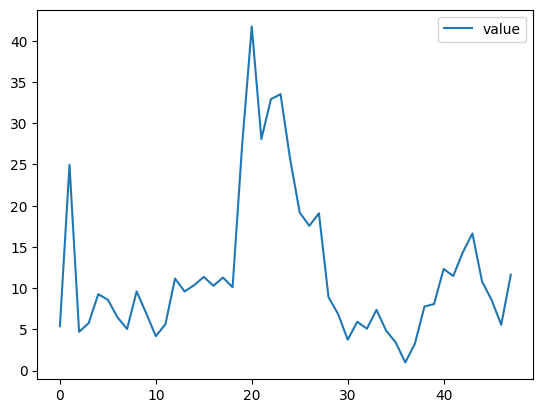

In [35]:
df[0:48].plot()


<AxesSubplot: xlabel='time'>

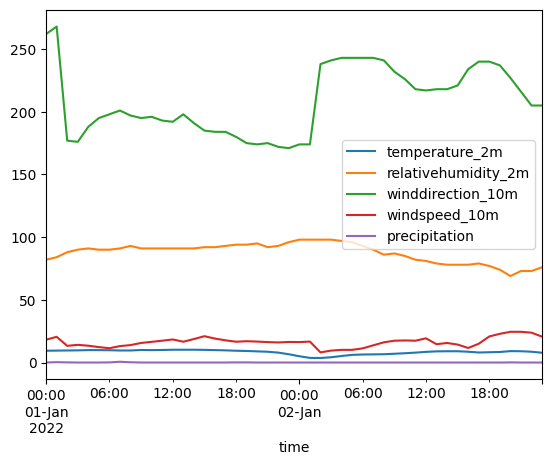

In [36]:
hourly_model[0:48].plot()


Untersuchen der Daten im Hinblick nach jährlichen Zyklus

<AxesSubplot: >

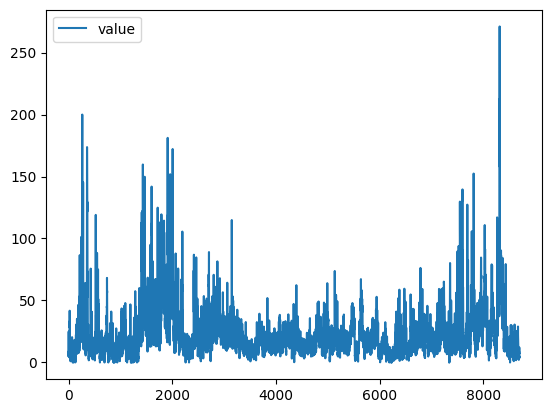

In [38]:
df.plot()


<AxesSubplot: xlabel='time'>

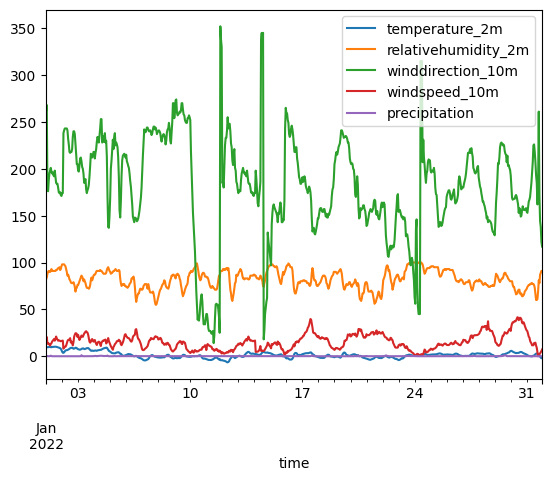

In [39]:
hourly_model.plot()
